# Dataset case0102 - mzda dle pohlaví

Pečlivě vypracovali: Yana Zabrodskaya, Yuliia Syzon, Andriy Plyskach

Parametry úlohy: K = 15, L = |Zabrodskaya| = 11 => M = (26*47)mod(11)+1 = 2

In [71]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, t

# ÚLOHA 1


## Zadání:

(1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Data stručně popište. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.


## Řešení:


Načteme data ze souboru do pandas dataframe.

In [72]:
data = pd.read_csv('my_data.csv', sep=',', header = None) 
data.columns = data.iloc[0]   # Nastavíme header
data.drop(data.index[0], inplace=True)  # Vyhodíme první řádek, odpsahující header
print("Velikost souboru: ", len(data))
print("Počet mužů: ", len(data[data.Sex == "Male"]))
print("Počet žen: ", len(data[data.Sex == "Female"]))
data.head() # Ukazka struktury dat

Velikost souboru:  93
Počet mužů:  32
Počet žen:  61


,Salary,Sex
1,3900,Female
2,4020,Female
3,4290,Female
4,4380,Female
5,4380,Female


Data obsahuji hodnoty platů pro výběr 32 mužů a 62 žen. Mzdy jsou v rozmezí 3900 - 8100

Přetypujeme sloupec Salary do float, rozdělíme data do dvou skupin - males a females a necháme si jenom sloupec Salary.

In [73]:
data['Salary'] = data['Salary'].astype(float)

females = data[data.Sex=='Female']
males = data[data.Sex=='Male']

females = females["Salary"]
males = males["Salary"]

Na základě naších dat odhadneme střední hodnotu, rozptyl a medián pro každou skupinu:

In [74]:
f_mean = females.mean()
m_mean = males.mean()

females_2 = pd.Series([s**2 for s in females.values])
males_2 = pd.Series([s**2 for s in males.values])
f_var = females_2.mean() - f_mean ** 2
m_var = males_2.mean() - m_mean ** 2

def task1(data, title):
    print(f'Analýza platů {title}:')
    print()
    print(f'Střední hodnota {title}: {round(data.mean(),3)}')
    print(f'Rozptyl {title}: {round(data.var(),3)}')
    print(f'Median {title}: {data.median()}')
    
print("Zkoumaná data: \n")
print(data.head(5))
print(data.tail(5))
print('\n')
task1(females, 'ženy')
print('\n')
task1(males, 'muži')



Zkoumaná data: 

0  Salary     Sex
1  3900.0  Female
2  4020.0  Female
3  4290.0  Female
4  4380.0  Female
5  4380.0  Female
0   Salary   Sex
89  6600.0  Male
90  6840.0  Male
91  6900.0  Male
92  6900.0  Male
93  8100.0  Male


Analýza platů ženy:

Střední hodnota ženy: 5138.852
Rozptyl ženy: 291460.328
Median ženy: 5220.0


Analýza platů muži:

Střední hodnota muži: 5956.875
Rozptyl muži: 477112.5
Median muži: 6000.0


# ÚLOHA 2


## Zadání:
(1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

## Řešení:



In [75]:
def emp_distr_fun(bins, data):
    res = []
    for b in bins:
        count = 0
        for d in data:
            if d <= b:
                count += 1  # Napočítáme kolik hodnot v datasetu je menších než b (pro každé b v zadanému seznamu)
        res.append(count/len(data))
    return res

In [76]:
def lines_distr(d_range, data, bins):
    res = []
    for b in bins:
        count = 0
        for d in data:
            if d <= b:
                count += 1  # Napočítáme kolik hodnot v datasetu je menších než b (pro každé b v zadanému seznamu)
        res.append(count/len(data))
    return res

In [77]:
def distr_fun(data):
    form_1 = plt.figure(1, figsize=(20, 5))  # Vytvoří figure, do které budeme přidávat vizualizace
    bins=[4000 + (i * 200) for i in range(20)]
    
    vis_1 = form_1.add_subplot(121, title="Hustota (histogram)")  
    vis_1.hist(data, range=(4000, 8500), rwidth=1000, density=True, bins=bins)

    vis_2 = form_1.add_subplot(122, title="Distribuční funkce (empirická)")
    emp_distr_fun_vals = emp_distr_fun(bins, data)
    bins_ = [b for b in bins[1:]]
    bins_.append(bins[-1] + 200)
    for k in range(len(bins)):
        vis_2.hlines(emp_distr_fun_vals[k], bins[k], bins_[k], color='b')
    vis_2.scatter(bins, emp_distr_fun(bins, data))
    
    plt.show()

Muži:


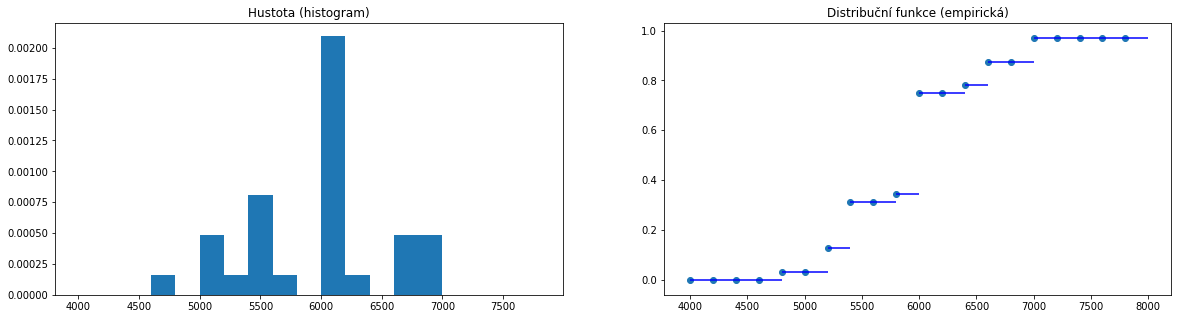

Ženy:


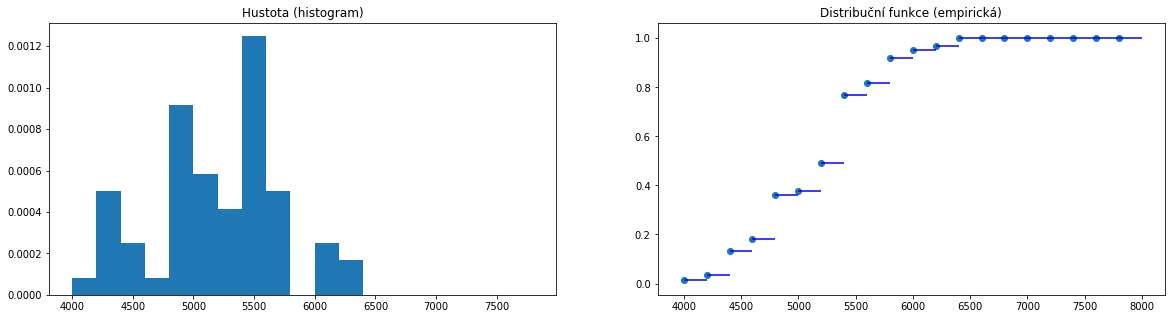

In [78]:
print("Muži:")
distr_fun(males)

print("Ženy:")
distr_fun(females)

# ÚLOHA 3

## Zadání:

(3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

## Řešení:
Z grafu hustoty lze vidět, že rozdělení odpovídá normalnému rozdělení s parametry : EX = 5138.852, varX = 286682.29 u žen a EX = 5956.875, varX = 462202.734 u můžu.

Pro odhad parametrů jsme použili funkce knihovny, ve kterých odhad je implementován pomocí MLE.





In [79]:
def uniform_param(array):
    Xn = array.sum() / len(array)
    a = Xn - math.sqrt(3 * (1 / len(array) * sum([i**2 for i in array]) - Xn**2))
    b = Xn + math.sqrt(3 * (1 / len(array) * sum([i**2 for i in array]) - Xn**2))
    return round(a, 3), round(b, 3)




### Normální rozdělení :

Ženy:
Odhadnuté parametry:
Střední hodnota μ = 5138.852, vyběrový rozptyl σ^2 = 286682.29


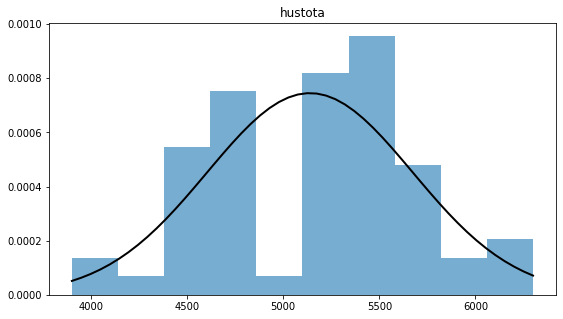

Muže:
Odhadnuté parametry:
Střední hodnota μ = 5956.875, vyběrový rozptyl σ^2 = 462202.734


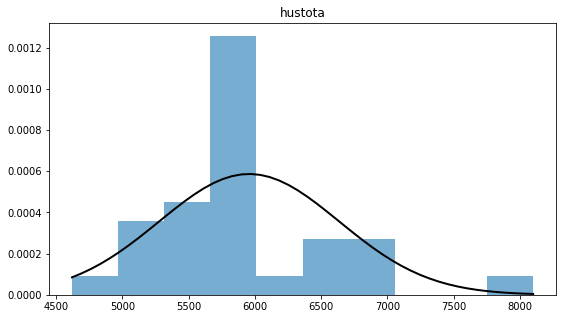

In [80]:
def norm_density(array):
    form_1 = plt.figure(1, figsize=(20, 5))
    vis_1 = form_1.add_subplot(121, title="hustota")
    mean, sigma = norm.fit(array)
    vis_1.hist(array, bins = 10, density=True, alpha=0.6)
    xmin = min(array)
    xmax = max(array)
    x = np.linspace(xmin, xmax, 50)
    p = norm.pdf(x, mean, sigma)
    vis_1.plot(x, p, 'k', linewidth=2)
    print('Odhadnuté parametry:')
    print(f'Střední hodnota μ = {round(mean,3)}, vyběrový rozptyl σ^2 = {round(sigma**2,3)}')
    plt.show()

print("Ženy:")
norm_density(females)
print("Muže:")
norm_density(males)




### Exponenciální rozdělení :

Ženy:
Odhadnuté parametry:
λ = 0.00026


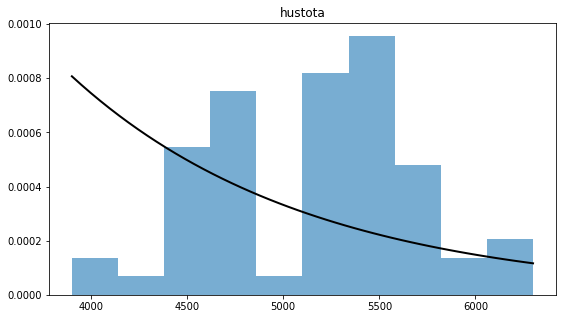

Muže:
Odhadnuté parametry:
λ = 0.00022


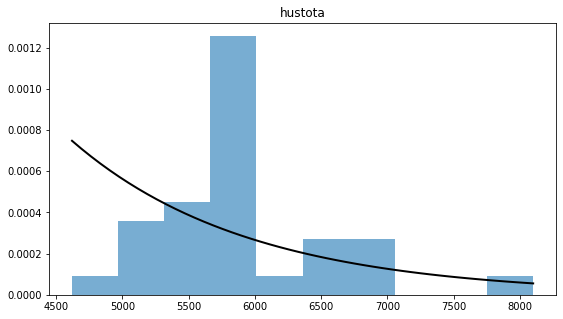

In [81]:
def expon_density(array):
    form_1 = plt.figure(1, figsize=(20, 5))
    vis_1 = form_1.add_subplot(121, title="hustota")
    mean, sigma = expon.fit(array)
    vis_1.hist(array, bins = 10, density=True, alpha=0.6)
    xmin = min(array)
    xmax = max(array)
    x = np.linspace(xmin, xmax, 50)
    p = expon.pdf(x, mean, sigma)
    vis_1.plot(x, p, 'k', linewidth=2)
    print('Odhadnuté parametry:')
    print(f'λ = {round(1/mean, 5)}')
    plt.show()
    
print("Ženy:")
expon_density(females)
print("Muže:")
expon_density(males)

### Rovnoměrné rozdělení

Ženy:
Odhadnuté parametry:
střední hodnota = 3900.0, smerodatná odchylka = 2400.0
parametry (a, b) = (4211.465, 6066.24)


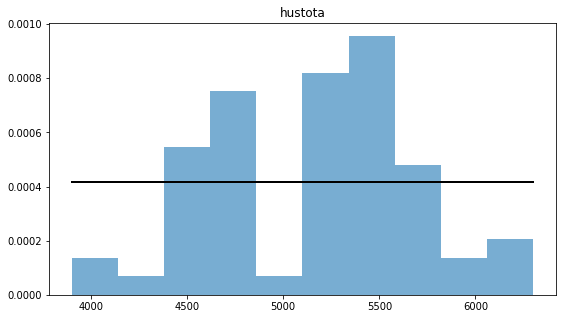

Muže:
Odhadnuté parametry:
střední hodnota = 4620.0, smerodatná odchylka = 3480.0
parametry (a, b) = (4779.332, 7134.418)


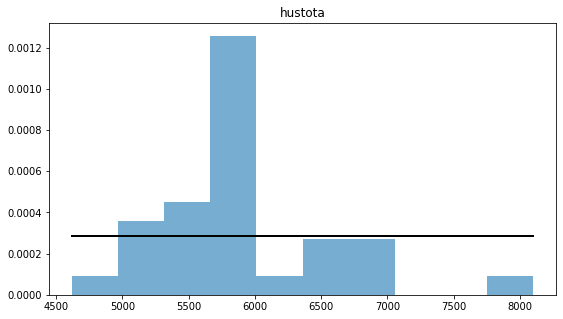

In [82]:
def uniform_density(array):
    form_1 = plt.figure(1, figsize=(20, 5))
    vis_1 = form_1.add_subplot(121, title="hustota")
    mean, sigma = uniform.fit(array)
    vis_1.hist(array, bins = 10, density=True, alpha=0.6)
    xmin = min(array)
    xmax = max(array)
    x = np.linspace(xmin, xmax, 50)
    p = uniform.pdf(x, mean, sigma)
    vis_1.plot(x, p, 'k', linewidth=2)
    print('Odhadnuté parametry:')
    print(f'střední hodnota = {round(mean,2)}, smerodatná odchylka = {sigma}')
    print(f'parametry (a, b) = {uniform_param(array)}')
    plt.show()

print("Ženy:")
uniform_density(females)
print("Muže:")
uniform_density(males)

# ÚLOHA 4

## Zadání:

(1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.


## Řešení:
Dle grafu hustoty jsme zvolili normální rozdělení, jako nejbližší rozdělení.



In [83]:
def norm_density_compare(array1, array2):
    form_1 = plt.figure(1, figsize=(20, 5))
    
    vis_1 = form_1.add_subplot(121, title="hustota (náhodný výběr)")
    mean, sigma = norm.fit(array1)
    vis_1.hist(array1, bins = 10, density=True, alpha=0.6)
    xmin = min(array1)
    xmax = max(array1)
    x = np.linspace(xmin, xmax, 50)
    p = norm.pdf(x, mean, sigma)
    vis_1.plot(x, p, 'k', linewidth=2)
    
    vis_2 = form_1.add_subplot(122, title="hustota (skutečná data)")
    mean, sigma = norm.fit(array2)
    vis_2.hist(array2, bins = 10, density=True, alpha=0.6)
    xmin = min(array2)
    xmax = max(array2)
    x = np.linspace(xmin, xmax, 50)
    p = norm.pdf(x, mean, sigma)
    vis_2.plot(x, p, 'k', linewidth=2)
    
    plt.show()

Normalní rozdělení

Ženy:


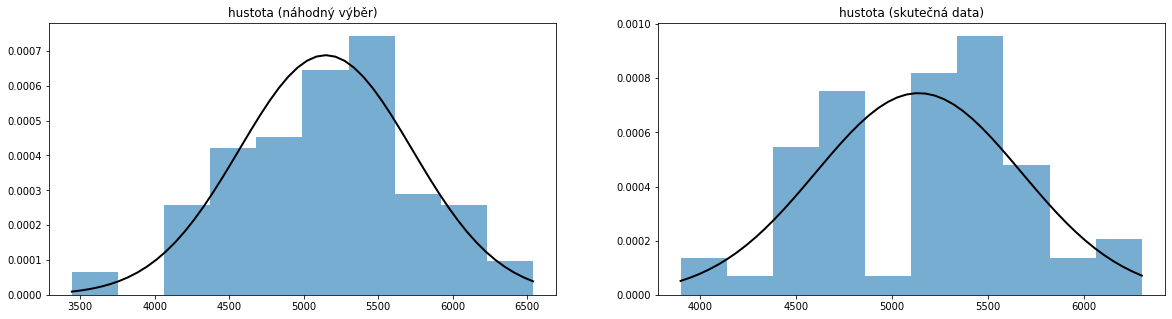

Muže:


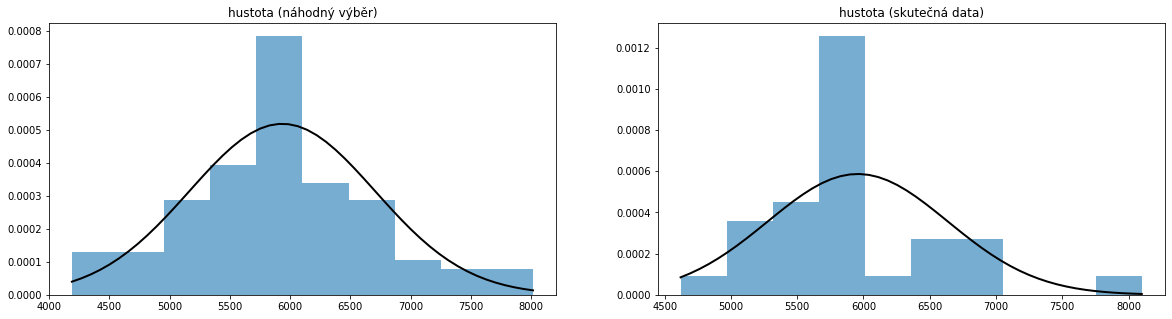

In [84]:
def random_choices(array):
    mean, sigma = norm.fit(array)
    s = np.random.normal(mean, sigma, 100)
    norm_density_compare(s, array)

print("Normalní rozdělení\n")
print("Ženy:")
random_choices(females)
print("Muže:")
random_choices(males)



# ÚLOHA 5

## Zadání:

(1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.


## Řešení:


In [85]:
def interval(data, title):
    X= sum(data)
    n = len(data)
    Xn = X/n                 # Vyběrový průměr
    s = 0
    for Xi in data:
        s = s +(Xi - Xn)**2
    sn2 = s/(n-1)            # Vyběrový rozptyl 
    criticalValue = t.ppf(0.95 + (1 - 0.95) / 2 , n - 1)
    L = Xn - criticalValue * math.sqrt(sn2 / n)
    U = Xn + criticalValue * math.sqrt(sn2 / n)
    print(f'Konfidenční interval pro {title} je: \n(L, U) = ', end='')
    return round(L, 3), round(U, 3)
    
print(interval(males,"může"))
print('\n')
print(interval(females,"ženy"))  
    

Konfidenční interval pro může je: 
(L, U) = (5707.839, 6205.911)


Konfidenční interval pro ženy je: 
(L, U) = (5000.585, 5277.12)


# ÚLOHA 6

## Zadání:

(1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

## Řešení:

Parametr úlohy K = 15

In [86]:
def task6 (data, title):
    K = 15
    print('Testujeme H0 =', K, 'proti HA !=', K)
    L, U = interval(data, title)
    print(f"({L}, {U})")
    if L <= K <= U:
        print('Střední hodnota K (parametr úlohy)', K, 'leží v 95% intervalu spolehlivosti')
    else:
        print('Střední hodnota K (parametr úlohy)', K, 'neleží v 95% intervalu spolehlivosti')
    print()
    
task6(females, "ženy")
task6(males, "muže")

Testujeme H0 = 15 proti HA != 15
Konfidenční interval pro ženy je: 
(L, U) = (5000.585, 5277.12)
Střední hodnota K (parametr úlohy) 15 neleží v 95% intervalu spolehlivosti

Testujeme H0 = 15 proti HA != 15
Konfidenční interval pro muže je: 
(L, U) = (5707.839, 6205.911)
Střední hodnota K (parametr úlohy) 15 neleží v 95% intervalu spolehlivosti



# ÚLOHA 7

## Zadání:

(2b) Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

## Řešení:

Zvolili jsme dvouvýběrový test pro srovnání středních hodnot dvou skupin s různými rosptyly

In [87]:
def test_dvouvyberovy(data1, data2):
    X = sum(data1)
    n1 = len(data1)
    Xn = X/n1        # Vyběrový průměr data1
    Y = sum(data2)
    n2 = len(data2)
    Yn = Y/n2        # Vyběrový průměr data2
    s1 = 0
    for Xi in data1:
        s1 = s1 + (Xi - Xn)**2
    sn1 = s1/(n1-1)    # Vyběrový rozptyl data1
    s2 = 0
    for Yi in data2:
        s2 = s2 + (Yi - Yn)**2
    sn2 = s2/(n2-1)    # Vyběrový rozptyl data2
    
    sd = math.sqrt(sn1/n1 + sn2/n2)
    nd = sd**4 / ((1 / (n1 - 1)) * ((sn1/n1)**2) + ((1 / (n2 - 1)) * ((sn2/n2)**2)))
    T = (Xn - Yn)/sd
    print('Chceme testovat H0: μ1 = μ2 proti HA: μ1 !=μ 2')
    ta = t.ppf(0.975, nd)
    print("Testová statistika T =", round(T, 3))
    print("0.025 kritická hodnota t-rozdělení s", round(nd), "stupni volnosti =", round(ta, 3))
    
    if abs(T) < ta:
        print(f"protože |{round(T, 3)}| < {round(ta, 3)} hypotezu shody nezamítáme:")
        print("Střední hodnoty dvou skupin jsou stejné")
    else:
        print(f"protože |{round(T, 3)}| > {round(ta, 3)} hypotezu shody zamítáme:")
        print("Střední hodnoty dvou skupin nejsou stejné")
        
test_dvouvyberovy(males, females)

Chceme testovat H0: μ1 = μ2 proti HA: μ1 !=μ 2
Testová statistika T = 5.83
0.025 kritická hodnota t-rozdělení s 51 stupni volnosti = 2.007
protože |5.83| > 2.007 hypotezu shody zamítáme:
Střední hodnoty dvou skupin nejsou stejné


![SegmentLocal](we_tried.gif "segment")